<a href="https://colab.research.google.com/github/crystalloide/Big_Data/blob/master/Pr%C3%A9paration_des_donn%C3%A9es_-_Exemple_sur_le_jeu_de_donn%C3%A9es_Naufrage_du_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip install --upgrade kagglehub

In [20]:
# IMPORTANT : Nettoyage avant import source de données

print('Nettoyage avant import source de données')

!ls
!pwd
!rm gender_submission.csv
!rm test.csv
!rm train.csv
!rm Titanic.zip
!ls


Nettoyage avant import source de données
gender_submission.csv  sample_data  test.csv  Titanic.zip  train.csv
/content
sample_data


In [21]:
# Récupération du jeu de données dans Google drive :
## https://drive.google.com/file/d/1NlUrZikkUaAb77LskKpoWf9CQJDbpKyE/view?usp=drive_link

file_id = '1NlUrZikkUaAb77LskKpoWf9CQJDbpKyE'
#
fn = 'Titanic.zip'
#
download_link = f'https://drive.google.com/uc?export=download&id={file_id}'
#
!wget "{download_link}" -O "{fn}"
print('Data source import terminé.')

--2025-06-21 14:42:26--  https://drive.google.com/uc?export=download&id=1NlUrZikkUaAb77LskKpoWf9CQJDbpKyE
Resolving drive.google.com (drive.google.com)... 172.217.203.101, 172.217.203.100, 172.217.203.113, ...
Connecting to drive.google.com (drive.google.com)|172.217.203.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1NlUrZikkUaAb77LskKpoWf9CQJDbpKyE&export=download [following]
--2025-06-21 14:42:26--  https://drive.usercontent.google.com/download?id=1NlUrZikkUaAb77LskKpoWf9CQJDbpKyE&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.204.132, 2607:f8b0:400c:c15::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.204.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34877 (34K) [application/octet-stream]
Saving to: ‘Titanic.zip’

Titanic.zip         100%[===================>]  34.06K  --.-KB/s

In [22]:
print('Décompression des données sources')

!ls
!pwd
!unzip Titanic.zip
!ls

Décompression des données sources
sample_data  Titanic.zip
/content
Archive:  Titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               
gender_submission.csv  sample_data  test.csv  Titanic.zip  train.csv


# **Tutoriel général de préparation des données**


### Bienvenue dans ce tutoriel de préparation de données.

### Ce notebook est destiné à montrer les étapes de préparation d'un jeu de données
### avant de le transmettre à un algorithme de machine learning.


![](https://2s7gjr373w3x22jf92z99mgm5w-wpengine.netdna-ssl.com/wp-content/uploads/2016/07/shutterstock_data_prep_-faithie.jpg)

### Voici quelques ressources supplémentaires que vous pouvez consulter pour approfondir la compréhension des différentes techniques que nous allons voir dans ce cahier :

[*Gérer les valeurs manquantes*](https://towardsdatascience.com/tag/handling-missing-values/)

[*Ingénierie des fonctionnalités*](https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/)

[*Pourquoi l'encodage à chaud en apprentissage automatique ?*](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/)

[*Piège à variables fictives*](https://www.algosome.com/articles/dummy-variable-trap-regression.html)

[*Encodage à chaud*](https://www.kaggle.com/dansbecker/using-categorical-data-with-one-hot-encoding)

[*Mise à l'échelle et Normalisation*](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e)

## **Table des matières**

[**1. Traitement des valeurs manquantes et des valeurs aberrantes**](#1)

[**2. Ingénierie des caractéristiques**](#2)

[**3. Gestion des fonctionnalités catégorielles**](#3)

[**4. Mise à l'échelle des caractéristiques**](#4)

In [23]:
!pip install chart-studio
!pip install numpy
import pandas as pd
import numpy as np
import missingno as mn
import seaborn as sns
sns.set()
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import StandardScaler

import plotly.express as px
import matplotlib.cm as cm
import matplotlib.colors as mcolors

import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks as cf
cf.go_offline(connected=True)
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [24]:
# Path of datasets
titanic_df = pd.read_csv('train.csv')
titanic_df.head()
# display(titanic_df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **1. Traitement des valeurs manquantes et des valeurs aberrantes** <a id="1"></a>

#### Le 1er problème rencontré lors de la préparation des données pour leur transmission à un algorithme d'apprentissage automatique est celui des données manquantes.
#### En effet, les jeux de données massifs et/ou ceux issus de données réelles, présentent des valeurs manquantes.
#### Par exemple, notre jeu de données "titanesque" présente des valeurs manquantes :

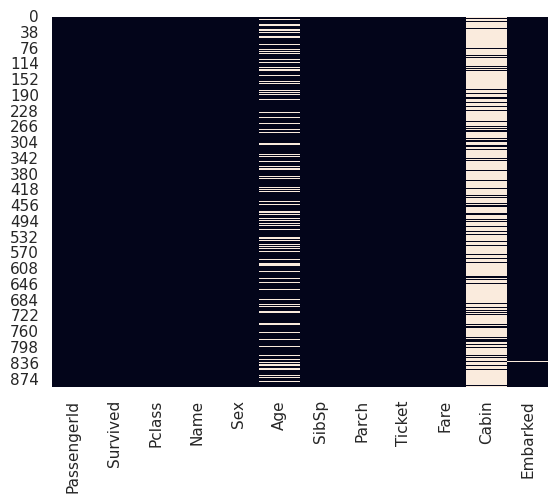

<Axes: >

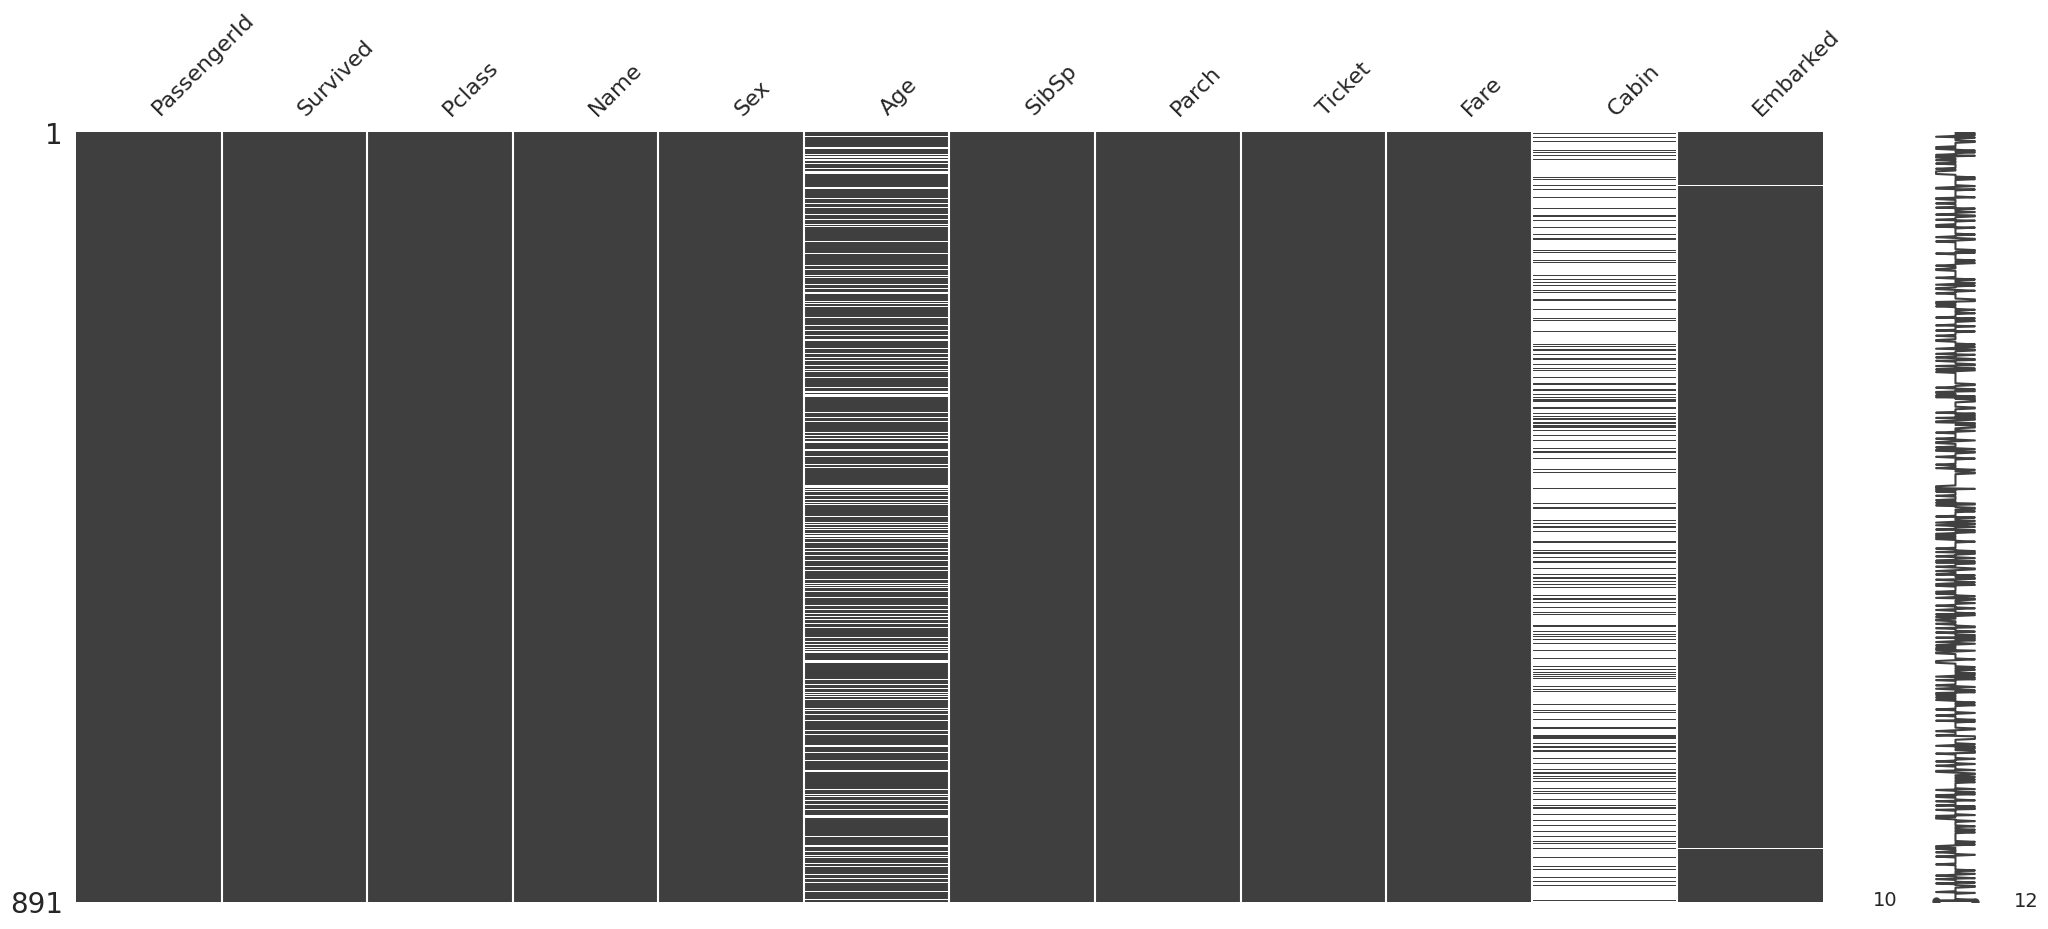

In [25]:
missing_values = titanic_df
sns.heatmap(missing_values.isnull(), cbar=False)
# Option 1 :
plt.show()
# Option 2 :
mn.matrix(missing_values)



### Si une caractéristique (= une colonne du jeu de données) a des valeurs manquantes, il y a un choix à faire :

### - S'il y a trop de données manquantes (> 60 %), il faudra alors peut-être supprimer la colonne :

### titanic_df.drop('Cabin', axis=1, inplace=True)

### - S'il y a peu de données manquantes (1 à 2 %), on peut envisager de supprimer ces lignes contenant NAN :

### titanic_df['Age'].dropna(inplace=True)


### En général, on ne souhaite pas perdre de données :

### Pour un petit nombre de données manquantes, une meilleure solution  consiste donc à étudier chaque observation au cas par cas
### et à remplacer les valeurs manquantes en examinant d'autres caractéristiques de cette observation,
### puis en essayant de trouver une tendance entre elles afin de déterminer la valeur manquante.

### Une 1ère solution consiste à remplacer les valeurs manquantes par la moyenne ou la médiane de la colonne.
### On privilégie la médiane pour des colonnes contenant des valeurs aberrantes susceptibles de fausser la moyenne.
```
Petit Rappel :
- La médiane divise une série statistique en deux parts égales,
- la moyenne est la somme des valeurs de la série, divisée par le nombre de valeurs de cette même série
```
#### L'ajout pour des valeurs manquantes est réalisé ainsi :
#### titanic_df['Age'].fillna(titanic_df['Age'].mean(), 1, inplace=True)
#### titanic_df['Age'].fillna(titanic_df['Age'].median(), 1, inplace=True)

### La stratégie de remplissage des valeurs manquantes dépend fortement du jeu de données et du contexte !
### Il faut se demander pourquoi ces données sont manquantes et comment les remplacer de façon pertinente dans le cadre de notre analyse !
### Il est conseillé d'essayer différentes méthodes de remplacement et de mesurer leur impact sur les performances du modèle.

### Examinons maintenant notre jeu de données Titanic :

In [37]:
print(titanic_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [38]:
draw_missing_data_table(titanic_df[['Cabin', 'Age', 'Embarked']])

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245


#### Comme on le voit, il ne manque que deux valeurs pour la colonne « Embarked ». Essayons donc de les remplacer.

#### Voici la répartition des valeurs de la colonne « Embarked » selon le tarif et le sexe, ainsi que les deux observations pour lesquelles la valeur « Embarked » est manquante.

#### Analysons ces deux observations et choisissons la valeur « Embarked» la plus adaptée en fonction de leur tarif et de leur sexe :

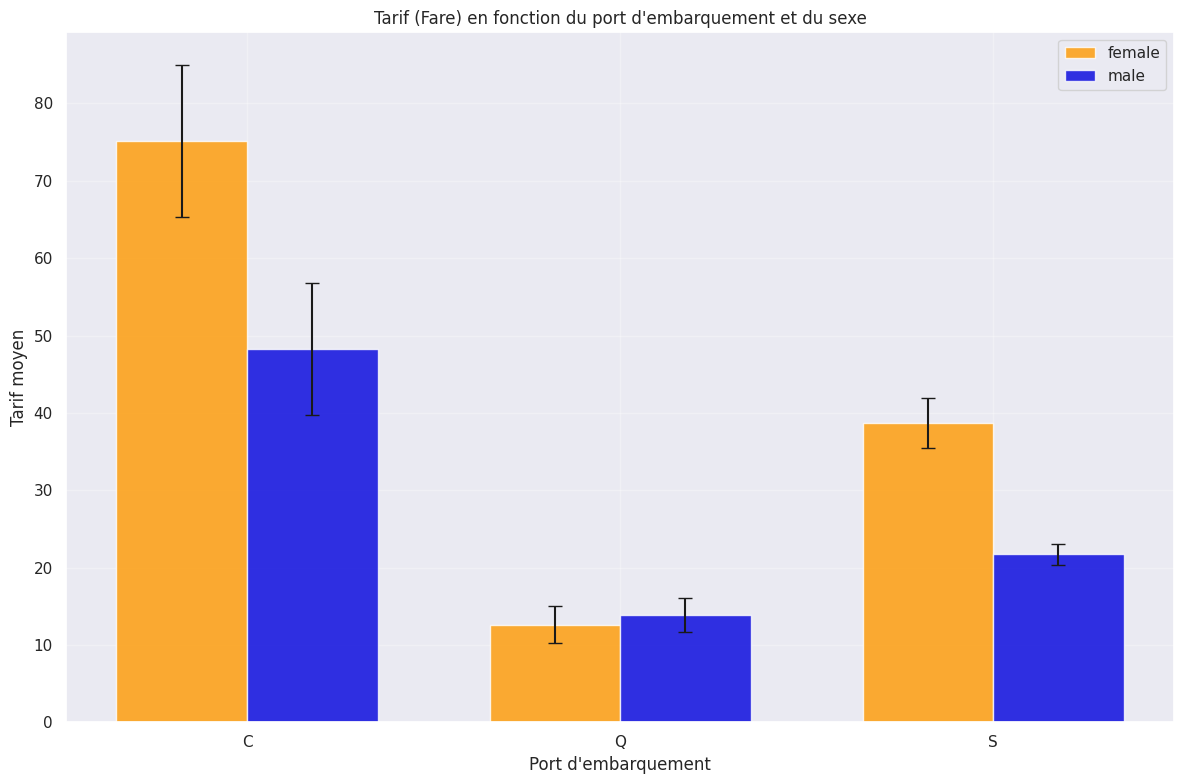

Graphique matplotlib affiché ci-dessus



In [46]:
# Solution 1: Utiliser matplotlib au lieu de plotly
import matplotlib.pyplot as plt
import numpy as np

# Préparation des données pour matplotlib
embarked_order = ['C', 'Q', 'S']
sexes = ['female', 'male']
colors_mpl = ['#ff9900', '#0000dd']  # Orange pour female, bleu pour male

# Configuration de la figure
fig, ax = plt.subplots(figsize=(12, 8))

# Position des barres
x = np.arange(len(embarked_order))
width = 0.35

# Création des barres pour chaque sexe
for i, sex in enumerate(sexes):
    data_sex = group_stats[group_stats['Sex'] == sex]
    means = []
    sems = []

    for embarked in embarked_order:
        row = data_sex[data_sex['Embarked'] == embarked]
        if not row.empty:
            means.append(row['mean_fare'].iloc[0])
            sems.append(row['sem'].iloc[0])
        else:
            means.append(0)
            sems.append(0)

    ax.bar(x + i*width, means, width, label=sex,
           color=colors_mpl[i], alpha=0.8, yerr=sems, capsize=5)

# Personnalisation du graphique
ax.set_xlabel('Port d\'embarquement')
ax.set_ylabel('Tarif moyen')
ax.set_title('Tarif (Fare) en fonction du port d\'embarquement et du sexe')
ax.set_xticks(x + width/2)
ax.set_xticklabels(embarked_order)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Graphique matplotlib affiché ci-dessus")
print("\n" + "="*50)

In [47]:
# Agrégation des données pour obtenir la moyenne et l'erreur standard (SEM) de Fare selon "Embarked" et "Sex"
# Vérification
print("Vérification des données:")
print(f"Shape du dataset: {titanic_df.shape}")
print(f"Colonnes disponibles: {titanic_df.columns.tolist()}")
print(f"\nValeurs uniques dans 'Embarked': {titanic_df['Embarked'].unique()}")
print(f"Valeurs uniques dans 'Sex': {titanic_df['Sex'].unique()}")
print(f"\nNombre de valeurs manquantes dans 'Fare': {titanic_df['Fare'].isna().sum()}")
print(f"Nombre de valeurs manquantes dans 'Embarked': {titanic_df['Embarked'].isna().sum()}")

# Nettoyage des données (supprimer les lignes avec des valeurs manquantes)
titanic_clean = titanic_df.dropna(subset=['Fare', 'Embarked', 'Sex'])
print(f"\nShape après nettoyage: {titanic_clean.shape}")

# Agrégation des données
group_stats = titanic_clean.groupby(['Embarked','Sex']).agg(
    mean_fare=('Fare', 'mean'),
    std_fare=('Fare', 'std'),
    count=('Fare', 'count')
).reset_index()

group_stats['sem'] = group_stats['std_fare'] / np.sqrt(group_stats['count'])

print("\nStatistiques groupées:")
print(group_stats)

# Création d'une palette inspirée du colormap nipy_spectral
colors = [mcolors.to_hex(cm.nipy_spectral(0.2)),
          mcolors.to_hex(cm.nipy_spectral(0.8))]



display(titanic_df[titanic_df['Embarked'].isnull()])

Vérification des données:
Shape du dataset: (891, 12)
Colonnes disponibles: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Valeurs uniques dans 'Embarked': ['S' 'C' 'Q' nan]
Valeurs uniques dans 'Sex': ['male' 'female']

Nombre de valeurs manquantes dans 'Fare': 0
Nombre de valeurs manquantes dans 'Embarked': 2

Shape après nettoyage: (889, 12)

Statistiques groupées:
  Embarked     Sex  mean_fare   std_fare  count       sem
0        C  female  75.169805  83.574380     73  9.781641
1        C    male  48.262109  82.715093     95  8.486390
2        Q  female  12.634958  14.298841     36  2.383140
3        Q    male  13.838922  14.243486     41  2.224459
4        S  female  38.740929  46.047877    203  3.231927
5        S    male  21.711996  28.584699    441  1.361176


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### Les deux passagères sont des femmes qui ont payé 80 dollars pour leur billet. De plus, elles ont le même billet et la même cabine ; elles ont donc probablement dû embarquer au même endroit ! D'après la distribution ci-dessus, la valeur d'embarquement la plus probable pour elles est Cherbourg (C). Remplaçons ces valeurs manquantes :

In [ ]:
titanic_df['Embarked'].fillna('C', inplace=True)

#### Pour l'âge, nous avons 177 valeurs manquantes  ! => C'est beaucoup trop pour les examiner au cas par cas.

In [ ]:
print(int(titanic_df['Age'].isnull().sum()))

In [ ]:
display(titanic_df[titanic_df['Age'].isnull()])

#### Nous allons remplacer les valeurs manquantes par la valeur médiane, même s'il existe peut-être une meilleure solution prenant en compte d'autres colonnes.

#### Si vous trouvez une solution pour remplacer les valeurs d'âge manquantes qui améliore considérablement la précision de votre modèle, n'hésitez pas à la proposer !

In [ ]:
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

#### Enfin, la colonne « Cabin » (cabine) permet de trouver le pont où se trouve la cabine du passager :
#### => nous la conserverons donc.

#### Remplaçons les valeurs manquantes par « U », c'est-à-dire 'Unkown':

In [ ]:
titanic_df['Cabin'].fillna('U', inplace=True)

In [ ]:
draw_missing_data_table(titanic_df[['Cabin', 'Age', 'Embarked']])

## **2. Ingénierie des caractéristiques** <a id="2"></a>

### L'ingénierie des caractéristiques est l'art de créer de nouvelles caractéristiques à partir de caractéristiques existantes ou de connaissances sur les données.

#### Par exemple, une simple recherche sur Internet permet de savoir que la première lettre de la colonne « cabine » correspond au pont du bateau où se trouve la cabine.
#### Ainsi, nous pouvons créer une entité « Pont » à partir de la caractéristiques « cabine ».

#### Nous pouvons également créer une colonne « Title » correspondant au titre de chaque passager.

#### La création de caractéristiques est la seule limite !

#### Mais l'objectif n'est pas de créer des caractéristiques simplement pour créer des caractéristiques, mais d'améliorer la précision du modèle !

#### Voici quelques exemples de création de caractéristiques pour le jeu de données Titanic :

In [ ]:
# Deck column from letter contained in cabin
titanic_df['Deck'] = titanic_df['Cabin'].str[:1]
titanic_df['Deck'] = titanic_df['Cabin'].map({cabin: p for p, cabin in enumerate(set(cab for cab in titanic_df['Cabin']))})

# Title column from title contained in name
titanic_df['Title'] = pd.Series((name.split('.')[0].split(',')[1].strip() for name in titanic_df['Name']), index=titanic_df.index)
titanic_df['Title'] = titanic_df['Title'].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic_df['Title'] = titanic_df['Title'].replace(['Mlle', 'Ms'], 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Mme', 'Mrs')

# Famillysize columns obtained by adding number of sibling and parch
titanic_df['FamillySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
titanic_df['FamillySize'][titanic_df['FamillySize'].between(1, 5, inclusive='neither')] = 2
titanic_df['FamillySize'][titanic_df['FamillySize']>5] = 3
titanic_df['FamillySize'] = titanic_df['FamillySize'].map({1: 'Alone', 2: 'Medium', 3: 'Large'})

# IsAlone and IsChild column, quite explicit
titanic_df['IsAlone'] = np.where(titanic_df['FamillySize']!=1, 0, 1)
titanic_df['IsChild'] = titanic_df['Age'] < 18
titanic_df['IsChild'] = titanic_df['IsChild'].astype(int)

### Une fois que nous avons terminé de créer nos nouvelles fonctionnalités, nous pouvons supprimer toutes les colonnes restantes qui seront inutiles et afficher les premières lignes de notre dataset :

In [ ]:
titanic_df = titanic_df.drop(['Name', 'Ticket', 'PassengerId', 'Cabin'], axis=1)
titanic_df.head()

## **3. Gestion des fonctionnalités catégorielles** <a id="3"></a>

### Comme vous pouvez le constater en examinant l'ensemble de données ci-dessus, nos données contiennent des caractéristiques catégorielles.
### Ces caractéristiques sont des caractéristiques dont les valeurs ne sont pas numériques.
### Nous avons quatre colonnes de type catégorie :
  - Sex
  - Embarked
  - Title
  - FamilySize

### Nous devons les transformer en caractéristiques numériques avant de pouvoir les transmettre à un algorithme de machine learning.

### Une solution consiste à transformer ces caractéristiques en caractéristiques numériques en mappant les valeurs de chaîne avec des valeurs numériques. Cette solution est appelée "label encoding" (codage d'étiquettes).
### Elle est facile à réaliser en Python à l'aide de la classe LabelEncoder de Scikit Learn ou de la méthode map d'un dataframe Pandas.
### Par exemple, pour encoder par étiquette la colonne "Embarked" du jeu de données Titanic, nous allons créer de nouvelles colonnes à partir de "embarked" en y ajoutant la lettre de la ville d'embarquement  : la valeur "string" de la ville sera remplacé par une valeur de type "number" distincte dans les 3 colonnes crées correspondant au lieu d'embarquement :

- Embarqué à Cherbourg ("Embarked_C") correspond à 1
- Embarqué à Southampton ("Embarked_S") correspond à 2
- Embarqué à Queenstown ("Embarked_Q") correspond à 3

### Le problème est que l'algorithme peut interpréter cela comme un classement entre les trois valeurs.


### Alternative conseillée :

### Une meilleure solution consiste à utiliser l'encodage « hot-one ».

### Ce codage consiste à créer une colonne par valeur de la colonne source (appelée variable muette), qui prend uniquement des valeurs binaires. Par exemple, la colonne « embarked » « dummy encoded » donne trois colonnes : Embarked_C, Embarked_S et Embarked_Q. Par exemple, la colonne « Embarked_S » d'un passager ayant embarqué à Southampton sera définie à 1, tandis que les deux autres colonnes « embarked » seront définies à 0.

### Cependant, cette méthode crée une colonne redondante : avec deux des trois colonnes « Embarked », on peut facilement deviner la valeur de la troisième colonne.
### Par exemple, un passager dont les colonnes Embarked_C et Embarked_S sont définies à 0 aura nécessairement sa colonne Embarked_Q définie à 1.
### Afin d'éviter cette redondance, appelée piège de la variable factice, nous devons supprimer l'une des colonnes créées lors de la création d'une variable factice.

*Remarque : L'encodage one-hot est généralement efficace, mais cela peut varier au cas par cas. N'hésitez pas à tester l'effet de l'encodage one-hot sur votre modèle pour voir si vous en avez besoin.*

### Il existe une méthode très simple pour effectuer un encodage one-hot en Python : la fonction pandas get_dummies crée un encodage one-hot pour toutes les caractéristiques catégorielles d'un jeu de données.
### En ajoutant l'argument drop_first=True, nous supprimons une colonne pour chaque variable factice à encoder.

In [ ]:
titanic_df = pd.get_dummies(data=titanic_df, drop_first=True)
titanic_df.head()

## **4. Mise à l'échelle des caractéristiques** <a id="4"></a>

### Enfin, nous devons normaliser les données.

#### Cette normalisation est nécessaire,
#### car alimenter un modèle de machine learning avec des valeurs nombreuses ou hétérogènes
#### peut déclencher d'importantes mises à jour de gradient,
#### empêchant ainsi la convergence de l'algorithme de descente de gradient.

_

#### Examinons les plages de valeurs de notre dataframe :

In [ ]:
# Calcul des valeurs maximales des colonnes sélectionnées
ranges = titanic_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Deck', 'IsChild']].max().to_frame().T

# Affichage du graphique
# ranges.iplot(kind='bar', xTitle='Features', yTitle='Range', title='Plage de fonctionnalités avant mise à l échelle',
#             colors=['rgba(255, 153, 51, 1.0)'])  # Correction du format de couleur

# Création du graphique à partir des valeurs maximales calculées
fig = go.Figure(
    data=[
        go.Bar(
            x=ranges.columns,
            y=ranges.iloc[0],
            marker=dict(
                color='#FF9933',         # Couleur de remplissage
                line=dict(
                    color='#FF9933',     # Couleur de la bordure
                    width=1
                )
            )
        )
    ]
)

fig.update_layout(
    title='Plage de fonctionnalités avant mise à l échelle',
    xaxis_title='Features',
    yaxis_title='Range'
)
fig.show()

# ranges = titanic_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Deck', 'IsChild']].max().to_frame().T
# ranges.iplot(kind='bar', xTitle='Features', yTitle='Range', title='Range of feature before scaling')

### Les plages sont très hétérogènes.

### Une façon de remédier à cela est d'utiliser la mise à l'échelle des caractéristiques ('features scaling').

### Cette mise à l'échelle définit la moyenne de chaque colonne à 0 et la variance de chaque colonne à 1.

### En Python, la classe StandarScaler du module scikit-learn permet de le faire très facilement :

In [ ]:
X = titanic_df.drop(['Survived'], axis=1)
y = titanic_df['Survived']

# Feature scaling of our data
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X.values), index=X.index, columns=X.columns)
X.head()

### Et voilà ! Notre jeu de données est enfin prêt à intégrer un algorithme d'apprentissage automatique !

#### N'oubliez pas de consulter les 2 autres notebooks pour ce jeu de données :

- [**Complete Titanic tutorial with ML, NN & Ensembling**](https://www.kaggle.com/nhlr21/complete-titanic-tutorial-with-ml-nn-ensembling)
- [**Titanic colorful EDA**](https://www.kaggle.com/nhlr21/titanic-colorful-eda)